In [1]:
import os
import warnings

# To ignore all warnings
warnings.filterwarnings("ignore")
dir_ = "C:\\Users\\mqayum2\\Box\\Spring 2024\\Data Science\\Data Science Final Project"
os.chdir(dir_)

os.getcwd()
%run 21_Meaning_Analysis.ipynb

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mqayum2\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mqayum2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
X = StandardScaler().fit_transform(drug_6.iloc[:, :-1])

y = StandardScaler().fit_transform(drug_6[['sum_tf']])

model = Lasso(alpha=.1)
model = model.fit(X=X,y=y)

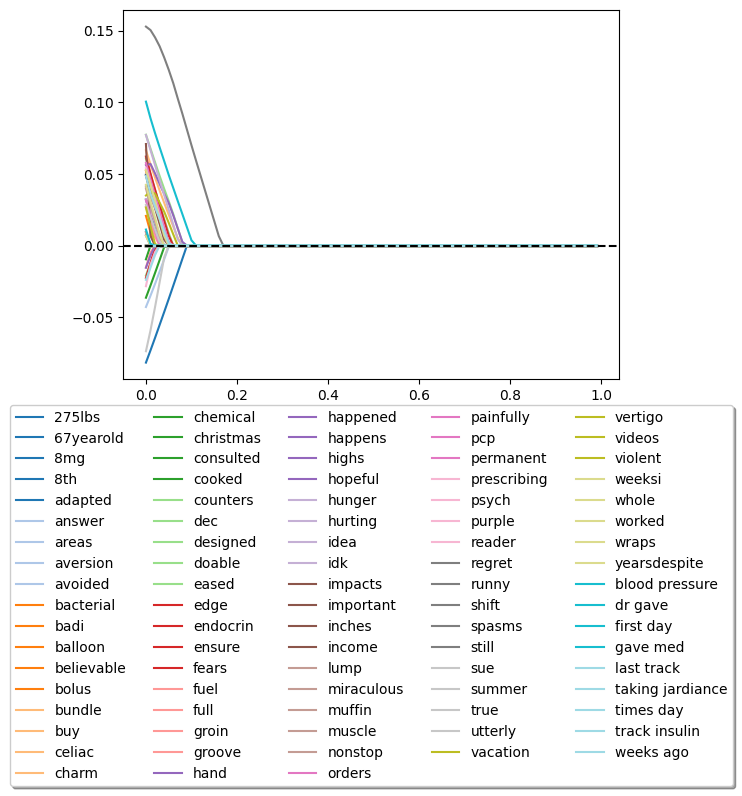

In [3]:
initial_words = list(drug_6[words].loc[:,model.coef_!=0].columns)
# Get a list of all of the coefficients which are themselves a list for every value of the grid
Alpha = np.arange(0,1,.01)
out = [list(get_coefs(a,initial_words,['sum_tf'])) for a in Alpha]
out = [list(get_coefs(a,initial_words,['sum_tf'])) for a in Alpha]
OUT = pd.DataFrame(out).iloc[:, :len(initial_words)]
OUT.columns = initial_words
OUT.index = Alpha

                            #  word labels         alpha vals
# Plot it over alpha
OUT.plot(cmap="tab20") # this colormap is easier to see
plt.axhline(0,color='black',ls="--") # origin line
#plt.axvline(lasso_model.alpha_,color='black',ls="--") # a vertical line for the optimal value of alpha
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=5) # Putting the legend below the graph

In [4]:
Alpha = np.arange(0,.05,.005)
# Fitting the LassoCV model with 10-fold cross validation
lasso_model = LassoCV(alphas=Alpha,cv=10)

# Fit the data
lasso_model = lasso_model.fit(X=X,y=y)

In [5]:
lasso_model.alpha_

0.005

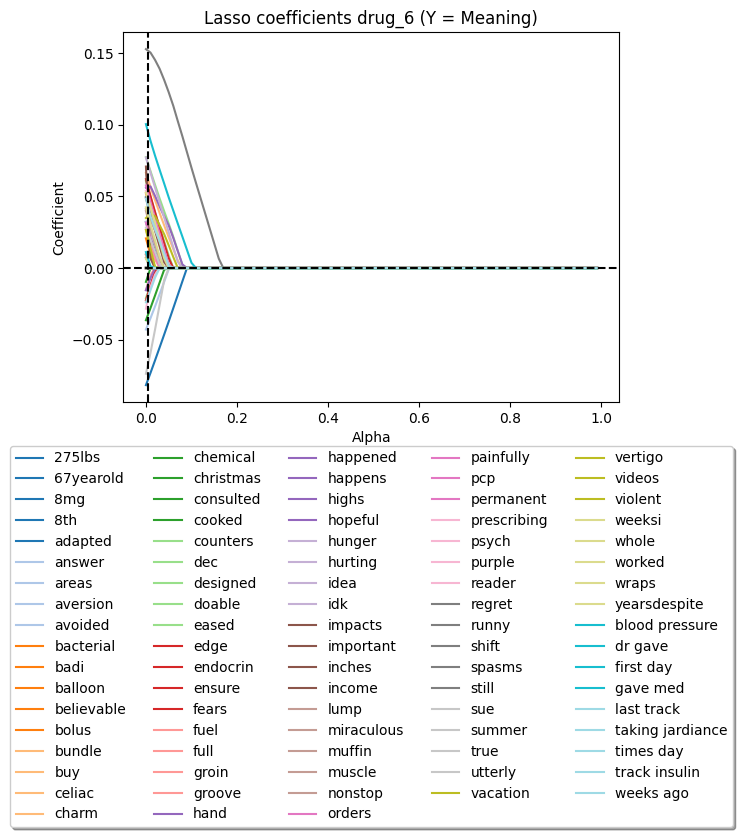

In [6]:
## Plotting again but after adding a vertical line for the optimal alpha value

# Plot it over alpha
OUT.plot(cmap="tab20") # this colormap is easier to see
plt.title("Lasso coefficients drug_6 (Y = Meaning)")
plt.xlabel("Alpha")
plt.ylabel("Coefficient")
plt.axhline(0,color='black',ls="--") # origin line
plt.axvline(lasso_model.alpha_,color='black',ls="--") # a vertical line for the optimal value of alpha
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),fancybox=True, shadow=True, ncol=5) # Putting the legend below the graph

In [9]:
final_words = list(data[words].loc[:,lasso_model.coef_!=0].columns)
final_coefs = pd.DataFrame([words,lasso_model.coef_]).T

final_coefs = final_coefs.set_index(0)

final_coefs = final_coefs[final_coefs[1]!=0]

import numpy as np
final_coefs["abs_"] = np.abs(final_coefs[1])

meaningful_words=final_coefs[final_coefs[1]>.04].sort_values(by=1, ascending=True).reset_index()
meaningful_words['ranking'] = meaningful_words['abs_'].rank(method='dense', ascending=True)
meaningful_words.dropna(inplace=True)
mean_dic = meaningful_words.set_index(0).to_dict()['ranking']


non_meaningful_words=final_coefs[final_coefs[1]<-.02].sort_values(by=1, ascending=True).reset_index()
non_meaningful_words['ranking'] = non_meaningful_words['abs_'].rank(method='dense', ascending=True)
non_meaningful_words.dropna(inplace=True)
non_mean_dic = non_meaningful_words.set_index(0).to_dict()['ranking']


## Most Meaningful Words

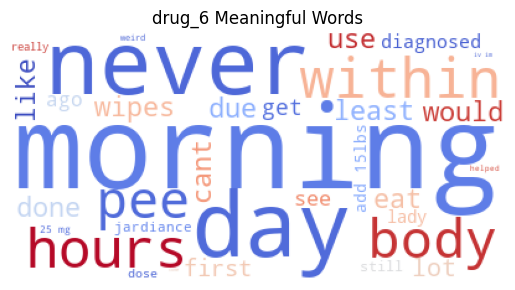

In [10]:
## Creating the word cloud
wordcloud = WordCloud(background_color='white', colormap='coolwarm')
wordcloud.generate_from_frequencies(mean_dic)
plt.imshow(wordcloud)
plt.title('drug_6 Meaningful Words')
plt.axis("off")
plt.show()

## Least Meaningful Words

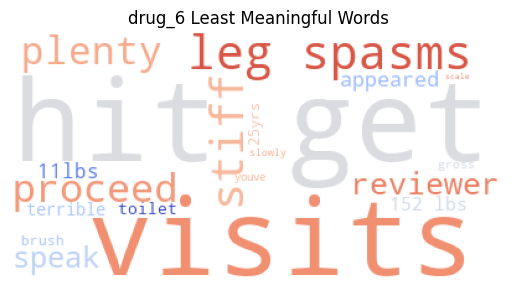

In [11]:
## Creating the word cloud
wordcloud = WordCloud(background_color='white', colormap='coolwarm')
wordcloud.generate_from_frequencies(non_mean_dic)
plt.imshow(wordcloud)
plt.title('drug_6 Least Meaningful Words')
plt.axis("off")
plt.show()